In [1]:
from pysentimiento import create_analyzer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pysentimiento.preprocessing import preprocess_tweet
df = pd.read_csv("comentarios.csv")

C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
analyzer = create_analyzer(task="sentiment", lang="es")

C:\Users\Rodrigo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\accelerate\accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [3]:
def aplicar_analyzer(texto):
    resultado = analyzer.predict(texto)
    return {
        'POS': resultado.probas.get('POS', 0),  # Obtener la probabilidad de POS o 0 si no está presente
        'NEU': resultado.probas.get('NEU', 0),  # Obtener la probabilidad de NEU o 0 si no está presente
        'NEG': resultado.probas.get('NEG', 0)   # Obtener la probabilidad de NEG o 0 si no está presente
    }

In [4]:

def limpiar_comentario(comentario):
    return preprocess_tweet(comentario, lang="es")

df['post_limpio'] = df['post'].apply(limpiar_comentario)

In [5]:
df[['POS_proba', 'NEU_proba', 'NEG_proba']] = df['post_limpio'].apply(aplicar_analyzer).apply(pd.Series)

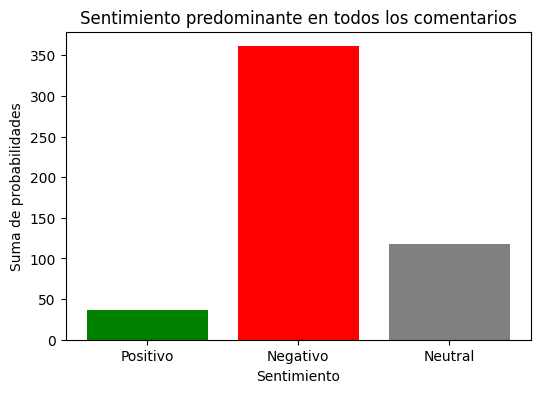

In [6]:
sum_pos = df['POS_proba'].sum()
sum_neu = df['NEU_proba'].sum()
sum_neg = df['NEG_proba'].sum()

# Graficar las sumas de probabilidades
plt.figure(figsize=(6, 4))
plt.bar(['Positivo', 'Negativo', 'Neutral'], [sum_pos, sum_neg, sum_neu], color=['green', 'red', 'grey'])

# Añadir título y etiquetas
plt.title('Sentimiento predominante en todos los comentarios')
plt.xlabel('Sentimiento')
plt.ylabel('Suma de probabilidades')

# Mostrar el gráfico
plt.show()

In [6]:

# Crear una nueva columna "sentimiento" con la clasificación para cada comentario
df['sentimiento'] = df[['POS_proba', 'NEU_proba', 'NEG_proba']].apply(lambda x: np.argmax(x), axis=1)

# Mapear los valores de índice a etiquetas de sentimiento (POS, NEU, NEG)
sentimiento_map = {0: 'Positivo', 1: 'Neutro', 2: 'Negativo'}
df['sentimiento'] = df['sentimiento'].map(sentimiento_map)

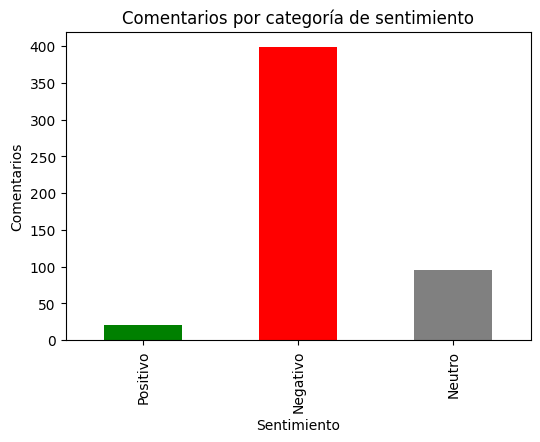

In [7]:
plt.figure(figsize=(6, 4))
df['sentimiento'].value_counts().loc[['Positivo', 'Negativo', 'Neutro']].plot(kind='bar', color=['green', 'red', 'grey'])
plt.title('Comentarios por categoría de sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Comentarios')
plt.show()

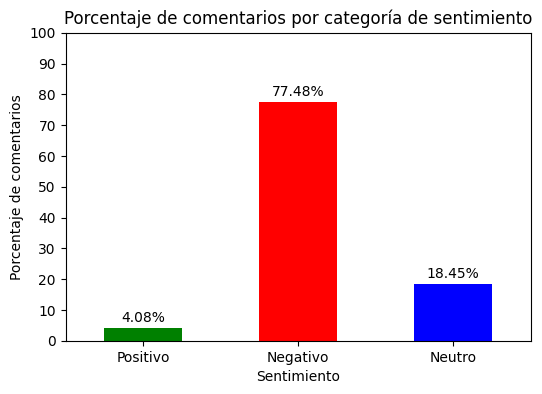

In [8]:
sentimiento_counts = df['sentimiento'].value_counts(normalize=True) * 100

# Reordenar las categorías en el orden deseado
sentimiento_counts = sentimiento_counts.loc[['Positivo', 'Negativo', 'Neutro']]

plt.figure(figsize=(6, 4))
sentimiento_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Porcentaje de comentarios por categoría de sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Porcentaje de comentarios')
plt.xticks(rotation=0)
plt.yticks(np.arange(0, 101, 10))  # Establecer los ticks del eje y en intervalos de 10

# Agregar etiquetas con los porcentajes
for i, v in enumerate(sentimiento_counts):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')

plt.show()